# Clustering de Ejemplo

In [8]:
# Leemos la tabla del archivo TablaEjemplo.txt

MiTabla <- read.csv("C:\\Users\\user\\Desktop\\BC\\Labo 08\\TablaEjemplo.txt",sep="\t",row.names="gen")
MiTabla

X0 X1 X2
genA  2  4  8
genB -1 -1 -2
genC -2  0  1
genD  0 -1 -6

In [9]:
# Calculamos las distancias de los datos

Distancias <- dist(MiTabla,method="euclidean")
Distancias

          genA      genB      genC
genB 11.575837                    
genC  9.000000  3.316625          
genD 15.000000  4.123106  7.348469


Call:
hclust(d = Distancias, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 4 


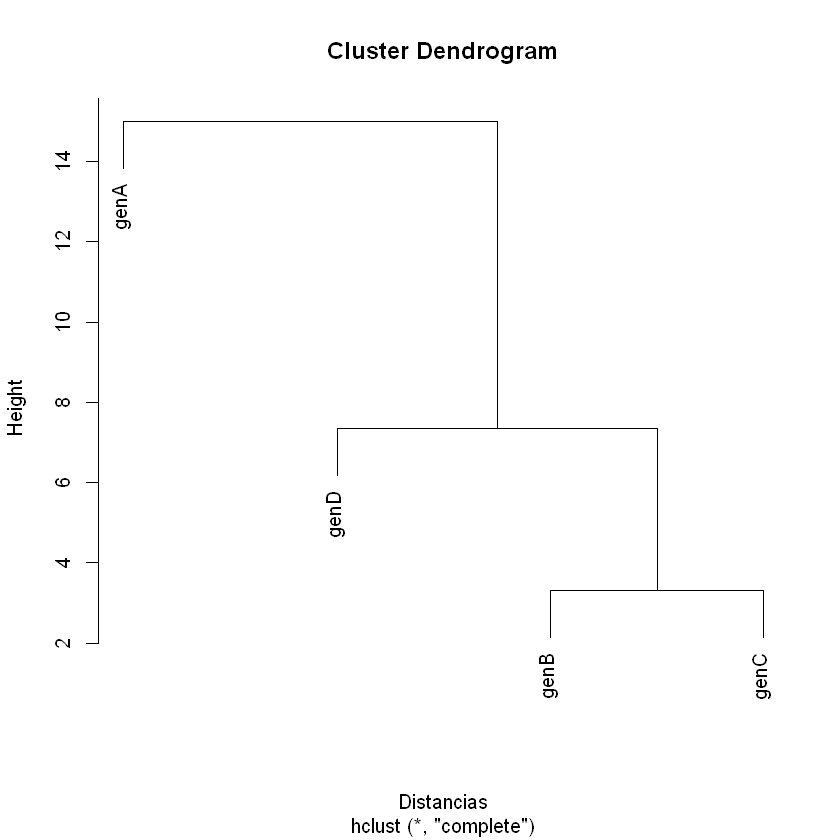

In [10]:
# Agrupación Jerárquica

ClusteringJerarquico <- hclust(Distancias,method="complete")
ClusteringJerarquico
plot(ClusteringJerarquico)

In [11]:
# SCALE() estandariza por columnas y nosotros queremos por filas, así que usaremos la matriz traspuesta, la estandarizaremos y luego 
# usaremos la traspuesta a esa para volver a las posiciones originales

MiTablaTraspuesta <- t(MiTabla)
MiTablaTraspuesta
MiTablaTraspuestaEstandarizada <- scale(MiTablaTraspuesta)
MiTablaTraspuestaEstandarizada
MiTablaEstandarizada <- t(MiTablaTraspuestaEstandarizada)
MiTablaEstandarizada

genA genB genC genD
X0 2    -1   -2    0  
X1 4    -1    0   -1  
X2 8    -2    1   -6

genA       genB       genC       genD      
X0 -0.8728716  0.5773503 -1.0910895  0.7258662
X1 -0.2182179  0.5773503  0.2182179  0.4147807
X2  1.0910895 -1.1547005  0.8728716 -1.1406469

X0         X1         X2        
genA -0.8728716 -0.2182179  1.0910895
genB  0.5773503  0.5773503 -1.1547005
genC -1.0910895  0.2182179  0.8728716
genD  0.7258662  0.4147807 -1.1406469

In [13]:
# Comparación de las tablas original y estandarizada

summary(t(MiTabla))
summary(t(MiTablaEstandarizada))
sd(t(MiTabla))
sd(t(MiTablaEstandarizada))

      genA            genB             genC              genD       
 Min.   :2.000   Min.   :-2.000   Min.   :-2.0000   Min.   :-6.000  
 1st Qu.:3.000   1st Qu.:-1.500   1st Qu.:-1.0000   1st Qu.:-3.500  
 Median :4.000   Median :-1.000   Median : 0.0000   Median :-1.000  
 Mean   :4.667   Mean   :-1.333   Mean   :-0.3333   Mean   :-2.333  
 3rd Qu.:6.000   3rd Qu.:-1.000   3rd Qu.: 0.5000   3rd Qu.:-0.500  
 Max.   :8.000   Max.   :-1.000   Max.   : 1.0000   Max.   : 0.000  

      genA              genB              genC              genD        
 Min.   :-0.8729   Min.   :-1.1547   Min.   :-1.0911   Min.   :-1.1406  
 1st Qu.:-0.5455   1st Qu.:-0.2887   1st Qu.:-0.4364   1st Qu.:-0.3629  
 Median :-0.2182   Median : 0.5774   Median : 0.2182   Median : 0.4148  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4364   3rd Qu.: 0.5774   3rd Qu.: 0.5455   3rd Qu.: 0.5703  
 Max.   : 1.0911   Max.   : 0.5774   Max.   : 0.8729   Max.   : 0.7259  

[1] 3.459725

[1] 0.8528029

          genA      genB      genC
genB 2.7892015                    
genC 0.5345225 2.6502294          
genD 2.8173208 0.2206430 2.7192317


Call:
hclust(d = DistanciasEstandarizadas, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 4 


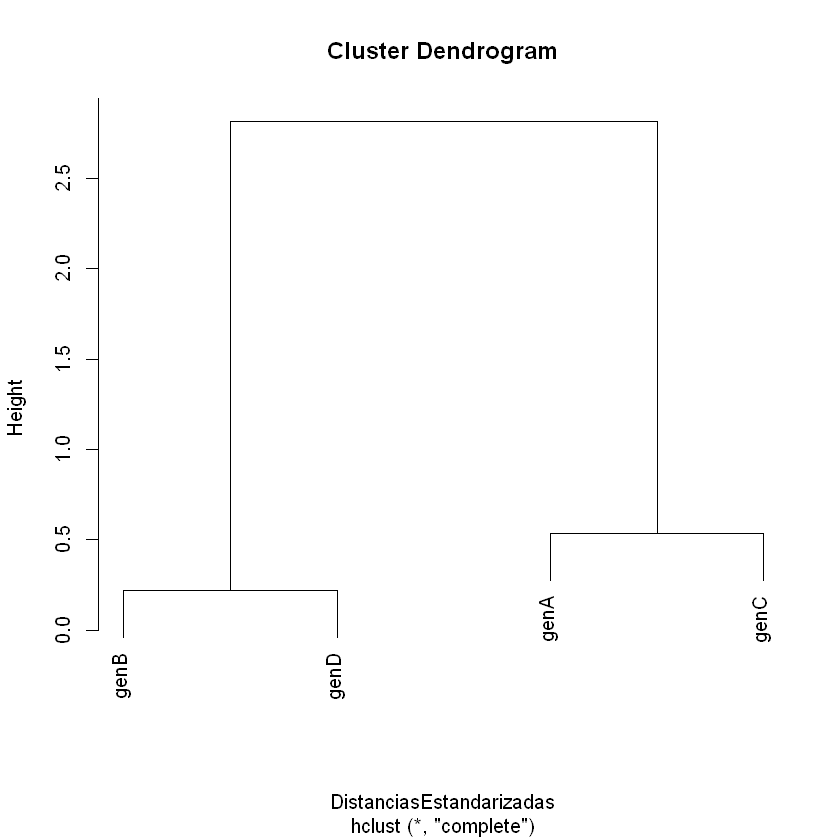

In [14]:
# Repetimos todo pero con MiTablaEstandarizada

DistanciasEstandarizadas <- dist(MiTablaEstandarizada,method="euclidean")
DistanciasEstandarizadas

ClusteringEstandarizado <- hclust(DistanciasEstandarizadas,method="complete")
ClusteringEstandarizado

plot(ClusteringEstandarizado)

In [15]:
# Ahora probaremos con Correlación entre los datos originales

DistanciasCorrelacionadas <- as.dist(1-cor(t(MiTabla)))
DistanciasCorrelacionadas

           genA       genB       genC
genB 1.94491118                      
genC 0.07142857 1.75592895           
genD 1.98432414 0.01217084 1.84855529

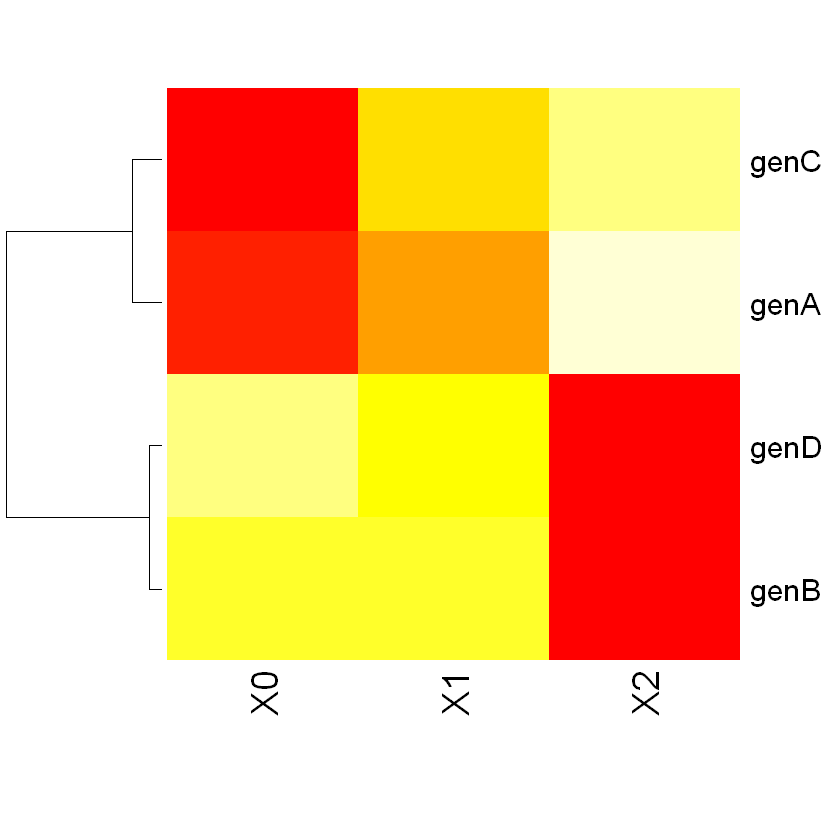

In [19]:
# Veamos el heatmap de la tabla estandarizada
heatmap(MiTablaEstandarizada,Colv=NA)

# Notamos que el genC y genA tienen tendencias similares al igual que las tienen el genB y genD

In [20]:
# Cortamos el árbol del dendograma para agrupar los dos subárboles formados como un conjunto de genes con similitudes considerables

MiCorte <- cutree(ClusteringEstandarizado,h=1.5) # Cortamos en esta altura
MiCorte
MiCorteGrupal <- cutree(ClusteringEstandarizado,k=2) # Cortamos en 2 subarboles
MiCorteGrupal


genA genB genC genD 
   1    2    1    2

genA genB genC genD 
   1    2    1    2

In [21]:
# Usamos el método de las K-medias para agrupar también

ClusteringKMedias <- kmeans(MiTablaEstandarizada,2) # Agrupamos en 2 conjuntos mediante K medias
ClusteringKMedias

K-means clustering with 2 clusters of sizes 2, 2

Cluster means:
          X0            X1         X2
1  0.6516082  4.960655e-01 -1.1476737
2 -0.9819805 -5.551115e-17  0.9819805

Clustering vector:
genA genB genC genD 
   2    1    2    1 

Within cluster sum of squares by cluster:
[1] 0.02434168 0.14285714
 (between_SS / total_SS =  97.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

# Ejercicio

Analizar el archivo `diauxic.txt` y realizar el Clustering como se vio anteriormente.

In [22]:
# Leemos la tabla del archivo diauxic.txt

Tabla <- read.csv("C:\\Users\\user\\Desktop\\BC\\Labo 08\\diauxic.txt",sep="\t",row.names="NAMES")
Tabla

col1  col2  col3  col4  col5  col6  col7 
YGR138C -1.23 -0.81  1.79  0.78 -0.42 -0.69 0.58 
YPR156C -1.76 -0.94  1.16  0.36  0.41 -0.35 1.12 
YOR230W -2.19  0.13  0.65 -0.51  0.52  1.04 0.36 
YAL018C -1.22 -0.98  0.79 -0.76 -0.29  1.54 0.93 
YBR287W -1.47 -0.83  0.85  0.07 -0.81  1.53 0.65 
YCL075W -1.04 -1.11  0.87 -0.14 -0.80  1.74 0.48 
YDR055w -1.57 -1.17  1.29  0.23 -0.20  1.17 0.26 
YOR358W -1.53 -1.25  0.59 -0.30  0.32  1.41 0.77 
YBR006W -1.76 -0.72  0.13 -0.01 -0.23  1.30 1.28 
YBR241C -1.39 -0.42 -0.08 -0.29 -0.65  1.85 0.98 
YCR021c -1.52 -0.99  0.26  0.04 -0.42  1.43 1.19 
YCR061W -1.57 -0.39  0.33 -0.54 -0.51  1.59 1.09 
YDL024c -1.27 -1.14  0.57 -0.30 -0.47  1.46 1.14 
YDR298C -1.49 -0.87  0.41 -0.47 -0.25  1.38 1.29 
YER141w -1.69 -0.60  0.00  0.41 -0.62  1.45 1.05 
YER158c -1.54 -1.15  0.28 -0.05  0.16  0.60 1.69 
YGR028W -1.69 -0.59 -0.05 -0.37  0.00  1.44 1.26 
YGR149W -1.35 -1.18  0.20  0.09 -0.41  1.21 1.45 
YIR038C -1.16 -0.94 -0.04 -0.28 -0.51  1.74 1.19 
YJL155C -1.37 -0.77 -0.14 -0.48 -0.15  1.53 1.38 
YLR297W -1.74 -0.14 -0.20 -0.25 -0.36  1.59 1.09 
YLR423C -1.44 -0.90  0.04 -0.55  0.16  1.59 1.11 
YOL083W -1.30 -0.84 -0.29 -0.54  0.12  1.18 1.68 
YOR049C -1.17 -1.23 -0.02 -0.45  0.06  1.50 1.30 
YPL087W -1.36 -1.19  0.16  0.02 -0.30  1.43 1.25 
YBR052C -1.53 -0.93 -0.06  0.41 -0.27  1.77 0.62 
YBR054W -1.46 -1.36  0.09  0.34  0.05  1.44 0.91 
YBR056W -1.47 -1.20 -0.06  0.48 -0.21  1.42 1.04 
YBR183W -1.20 -1.23 -0.41  0.28  0.05  1.84 0.67 
YCL040w -1.63 -1.15 -0.01 -0.04  1.13  1.23 0.48 
...     ...   ...   ...   ...   ...   ...   ...  
YPR137W  1.06  0.80 0.77  0.09  0.05  -0.74 -2.02
YBR032W  0.43  0.62 0.87  0.60  0.38  -0.74 -2.15
YBR181C  0.63  0.66 0.66  0.54  0.57  -1.06 -2.00
YBR187W  0.30  0.63 1.17  0.68  0.22  -1.19 -1.80
YDR012W  0.57  0.59 0.77  0.58  0.45  -0.84 -2.12
YGL102C  0.61  0.48 0.75  0.59  0.55  -0.89 -2.10
YGR027C  0.59  0.51 0.77  0.57  0.61  -1.07 -1.99
YJL157C  0.59  0.77 0.56  0.55  0.66  -1.36 -1.78
YJL190C  0.67  0.34 0.91  0.65  0.45  -1.04 -1.98
YLR058c  0.06  0.26 0.93  0.22  1.36  -1.13 -1.70
YLR264W  0.59  0.38 1.11  0.72  0.16  -1.05 -1.91
YLR300W  0.08  0.59 1.22  0.44  0.54  -0.90 -1.96
YLR342W  0.26  0.74 0.84  0.82  0.44  -1.50 -1.60
YLR359W  0.08  0.70 1.14  0.28  0.72  -1.05 -1.87
YLR372W  0.46  0.73 1.05  0.28  0.44  -0.97 -1.98
YMR300C  0.27  0.32 0.69  0.56  1.11  -1.02 -1.94
YMR305C  0.59  0.41 0.94  0.44  0.72  -1.39 -1.71
YNL069C  0.49  0.54 0.89  0.38  0.50  -0.56 -2.23
YOR133W  0.56  0.53 0.98  0.57  0.43  -1.25 -1.84
YOR167C  0.59  0.37 1.19  0.57  0.26  -1.13 -1.85
YOR182C  0.79  0.26 0.69  0.80  0.44  -0.99 -2.00
YOR326W  0.43  0.67 0.72  0.53  0.79  -1.47 -1.67
YPL080C  0.17  0.27 1.63  0.23  0.32  -0.74 -1.88
YPL081W  0.74  0.41 0.70  0.48  0.71  -1.06 -1.98
YPL090C  0.63  0.52 1.03  0.52  0.39  -1.35 -1.74
YOR298W  0.29 -0.06 0.26  1.66  0.55  -1.07 -1.62
YDR019C -1.24 -0.50 0.22  0.88  1.87  -0.34 -0.87
YKL096W -1.12 -0.15 0.98  1.33  0.91  -0.61 -1.34
YKL108W -1.13 -0.27 1.06  0.51  1.08   0.46 -1.70
YPR113W -0.45 -0.39 0.57  0.42  0.50   1.36 -2.01

In [23]:
# Calculamos las distancias de los datos

MisDistancias <- dist(Tabla,method="euclidean")
MisDistancias

            YGR138C    YPR156C    YOR230W    YAL018C    YBR287W    YCL075W
YPR156C  1.40256907                                                       
YOR230W  2.94852506 2.20649043                                            
YAL018C  2.91768744 2.40472452 1.86711007                                 
YBR287W  2.55560169 2.34948931 1.97724556 1.06131993                      
YCL075W  2.80681314 2.66893237 2.30047821 0.97092739 0.61717096           
YDR055w  2.09954757 1.88279048 1.89126941 1.40804829 0.99929975 1.15373307
YOR358W  2.80779273 2.03413372 1.65308802 0.91389277 1.30007692 1.34577115
YBR006W  2.85567855 2.09854712 1.70420069 1.24137021 1.18625461 1.54709405
YBR241C  3.38880510 2.88974047 1.98322969 1.24438740 1.18570654 1.34469327
YCR021c  2.80561936 2.19879512 1.97040605 1.05242577 0.91148231 1.18063542
YCR061W  3.10364302 2.53937000 1.62923295 0.89838744 1.06456564 1.31514258
YDL024c  2.77559003 2.26157025 2.06753476 0.60909769 0.84380092 0.89011235
YDR298C  2.89067466 2.187


Call:
hclust(d = MisDistancias, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 832 


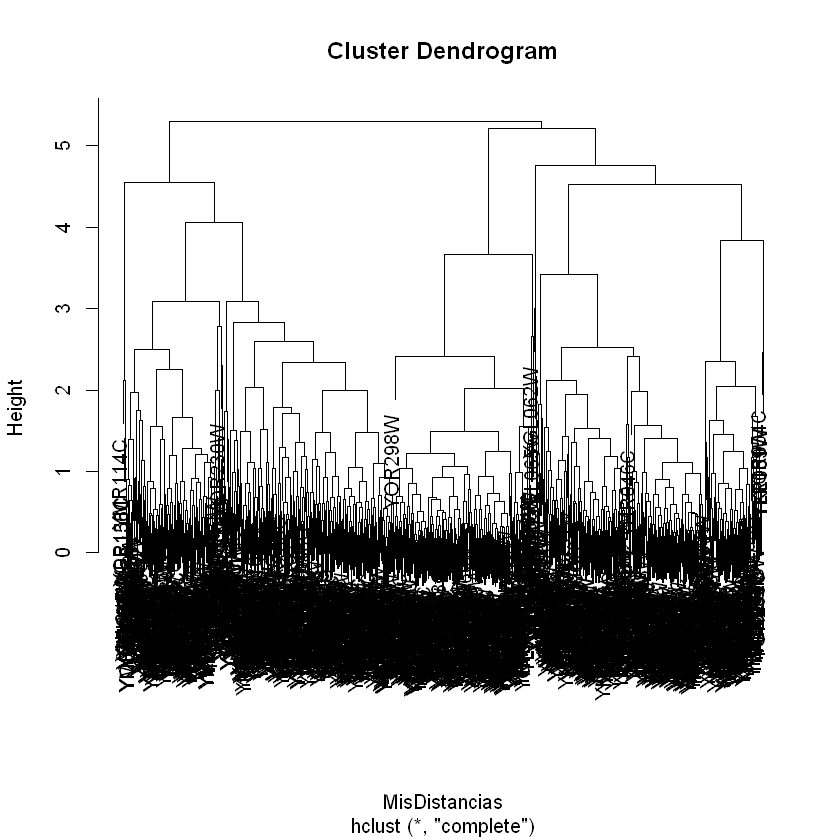

In [24]:
# Agrupación Jerárquica

MiClusteringJerarquico <- hclust(MisDistancias,method="complete")
MiClusteringJerarquico
plot(MiClusteringJerarquico)

In [25]:
TablaTraspuesta <- t(Tabla)
TablaTraspuesta
TablaTraspuestaEstandarizada <- scale(TablaTraspuesta)
TablaTraspuestaEstandarizada
TablaEstandarizada <- t(TablaTraspuestaEstandarizada)
TablaEstandarizada

YGR138C YPR156C YOR230W YAL018C YBR287W YCL075W YDR055w YOR358W YBR006W
col1 -1.23   -1.76   -2.19   -1.22   -1.47   -1.04   -1.57   -1.53   -1.76  
col2 -0.81   -0.94    0.13   -0.98   -0.83   -1.11   -1.17   -1.25   -0.72  
col3  1.79    1.16    0.65    0.79    0.85    0.87    1.29    0.59    0.13  
col4  0.78    0.36   -0.51   -0.76    0.07   -0.14    0.23   -0.30   -0.01  
col5 -0.42    0.41    0.52   -0.29   -0.81   -0.80   -0.20    0.32   -0.23  
col6 -0.69   -0.35    1.04    1.54    1.53    1.74    1.17    1.41    1.30  
col7  0.58    1.12    0.36    0.93    0.65    0.48    0.26    0.77    1.28  
     YBR241C ... YOR182C YOR326W YPL080C YPL081W YPL090C YOR298W YDR019C
col1 -1.39   ...  0.79    0.43    0.17    0.74    0.63    0.29   -1.24  
col2 -0.42   ...  0.26    0.67    0.27    0.41    0.52   -0.06   -0.50  
col3 -0.08   ...  0.69    0.72    1.63    0.70    1.03    0.26    0.22  
col4 -0.29   ...  0.80    0.53    0.23    0.48    0.52    1.66    0.88  
col5 -0.65   ...  0.44    0.79    0.32    0.71    0.39    0.55    1.87  
col6  1.85   ... -0.99   -1.47   -0.74   -1.06   -1.35   -1.07   -0.34  
col7  0.98   ... -2.00   -1.67   -1.88   -1.98   -1.74   -1.62   -0.87  
     YKL096W YKL108W YPR113W
col1 -1.12   -1.13   -0.45  
col2 -0.15   -0.27   -0.39  
col3  0.98    1.06    0.57  
col4  1.33    0.51    0.42  
col5  0.91    1.08    0.50  
col6 -0.61    0.46    1.36  
col7 -1.34   -1.70   -2.01

YGR138C    YPR156C    YOR230W    YAL018C    YBR287W     YCL075W   
col1 -1.1411740 -1.6292805 -2.0308561 -1.1331659 -1.35995493 -0.9636655
col2 -0.7515049 -0.8701839  0.1205531 -0.9105087 -0.76728975 -1.0285276
col3  1.6607330  1.0738439  0.6027655  0.7315878  0.78845636  0.8061432
col4  0.7236713  0.3332619 -0.4729391 -0.7064063  0.06614567 -0.1297242
col5 -0.3896692  0.3795483  0.4822124 -0.2703694 -0.74876896 -0.7412811
col6 -0.6401708 -0.3240046  0.9644248  1.4273914  1.41816312  1.6122865
col7  0.5381146  1.0368148  0.3338394  0.8614711  0.60324849  0.4447687
     YDR055w    YOR358W    YBR006W      YBR241C     ... YOR182C    YOR326W   
col1 -1.4520329 -1.4153138 -1.626461966 -1.28648568 ...  0.7336914  0.3979037
col2 -1.0824245 -1.1565437 -0.664590064 -0.38872229 ...  0.2423565  0.6199895
col3  1.1906670  0.5439452  0.121555240 -0.07404234 ...  0.6409867  0.6662574
col4  0.2112048 -0.2785739 -0.007927516 -0.26840349 ...  0.7429619  0.4904395
col5 -0.1861242  0.2944170 -0.211400418 -0.60159402 ...  0.4092250  0.7310325
col6  1.0797845  1.3017718  1.203661130  1.71222914 ... -0.9164521 -1.3602756
col7  0.2389254  0.7102974  1.185163594  0.90701868 ... -1.8527694 -1.5453471
     YPL080C    YPL081W    YPL090C    YOR298W     YDR019C    YKL096W   
col1  0.1574344  0.6858814  0.5832333  0.26749626 -1.1523307 -1.0367704
col2  0.2500429  0.3800154  0.4813989 -0.05694227 -0.4662303 -0.1388532
col3  1.5095181  0.6488067  0.9535402  0.23968724  0.2013267  0.9071741
col4  0.2129995  0.4448960  0.4813989  1.53744135  0.8132541  1.2311649
col5  0.2963471  0.6580754  0.3610492  0.50850773  1.7311451  0.8423760
col6 -0.6853027 -0.9824787 -1.2497857 -0.99317917 -0.3178843 -0.5646696
col7 -1.7410393 -1.8351961 -1.6108349 -1.50301114 -0.8092805 -1.2404217
     YKL108W    YPR113W   
col1 -1.0473882 -0.4167500
col2 -0.2512674 -0.3611834
col3  0.9799427  0.5278834
col4  0.4707957  0.3889667
col5  0.9984572  0.4630556
col6  0.4245096  1.2595112
col7 -1.5750496 -1.8614835

col1        col2        col3          col4         col5         
YGR138C -1.1411740  -0.7515049   1.660733e+00  0.723671347 -3.896692e-01
YPR156C -1.6292805  -0.8701839   1.073844e+00  0.333261911  3.795483e-01
YOR230W -2.0308561   0.1205531   6.027655e-01 -0.472939094  4.822124e-01
YAL018C -1.1331659  -0.9105087   7.315878e-01 -0.706406331 -2.703694e-01
YBR287W -1.3599549  -0.7672897   7.884564e-01  0.066145668 -7.487690e-01
YCL075W -0.9636655  -1.0285276   8.061432e-01 -0.129724199 -7.412811e-01
YDR055w -1.4520329  -1.0824245   1.190667e+00  0.211204789 -1.861242e-01
YOR358W -1.4153138  -1.1565437   5.439452e-01 -0.278573890  2.944170e-01
YBR006W -1.6264620  -0.6645901   1.215552e-01 -0.007927516 -2.114004e-01
YBR241C -1.2864857  -0.3887223  -7.404234e-02 -0.268403487 -6.015940e-01
YCR021c -1.4062167  -0.9154299   2.420862e-01  0.038363391 -3.876025e-01
YCR061W -1.4541817  -0.3612298   3.056560e-01 -0.500164404 -4.723775e-01
YDL024c -1.1761937  -1.0556603   5.298170e-01 -0.276829367 -4.344499e-01
YDR298C -1.3797676  -0.8056361   3.796676e-01 -0.435228720 -2.315046e-01
YER141w -1.5675948  -0.5565425  -7.355790e-18  0.380304063 -5.750939e-01
YER158c -1.4227457  -1.0621054   2.602422e-01 -0.044914905  1.492760e-01
YGR028W -1.5640998  -0.5460467  -4.627514e-02 -0.342436050 -5.504542e-18
YGR149W -1.2513866  -1.0939712   1.838718e-01  0.082014768 -3.809718e-01
YIR038C -1.0729555  -0.8694639  -3.699846e-02 -0.258989249 -4.717304e-01
YJL155C -1.2694984  -0.7135137  -1.297298e-01 -0.444787777 -1.389962e-01
YLR297W -1.6101236  -0.1283336  -1.839007e-01 -0.230206667 -3.320797e-01
YLR423C -1.3370381  -0.8361457   3.577803e-02 -0.511493280  1.470874e-01
YOL083W -1.2048469  -0.7789845  -2.698011e-01 -0.501248064  1.097720e-01
YOR049C -1.0797077  -1.1351450  -1.715917e-02 -0.414459911  5.675725e-02
YPL087W -1.2614217  -1.1039095   1.469232e-01  0.017207222 -2.792864e-01
YBR052C -1.4211113  -0.8643326  -5.700353e-02  0.379139770 -2.518761e-01
YBR054W -1.3521427  -1.2596207   8.194804e-02  0.313253005  4.493925e-02
YBR056W -1.3631969  -1.1128138  -5.564069e-02  0.445125527 -1.947424e-01
YBR183W -1.1081068  -1.1358094  -3.786031e-01  0.258558248  4.617112e-02
YCL040w -1.5102707  -1.0659178  -1.057983e-02 -0.038351882  1.044758e+00
...     ...         ...         ...           ...          ...          
YPR137W  0.98039090  0.73959314 0.7118088     0.08203001   0.0449842    
YBR032W  0.39676061  0.57265781 0.8041015     0.55414232   0.3504719    
YBR181C  0.58292534  0.61068368 0.6106837     0.49965029   0.5274086    
YBR187W  0.27597660  0.58100336 1.0801381     0.62721954   0.2020307    
YDR012W  0.52753662  0.54604667 0.7126372     0.53679165   0.4164763    
YGL102C  0.56535911  0.44515425 0.6948105     0.54686606   0.5098799    
YGR027C  0.54743581  0.47338652 0.7140467     0.52892349   0.5659481    
YJL157C  0.54713901  0.71365957 0.5193856     0.51013444   0.6118970    
YJL190C  0.61943287  0.31433907 0.8413193     0.60094233   0.4160370    
YLR058c  0.05554524  0.24069603 0.8609512     0.20366587   1.2590254    
YLR264W  0.54548628  0.35133014 1.0262538     0.66567817   0.1479285    
YLR300W  0.07284879  0.54570366 1.1298185     0.40662870   0.4993453    
YLR342W  0.24076826  0.68526352 0.7778667     0.75934607   0.4074540    
YLR359W  0.07410691  0.64843544 1.0560234     0.25937418   0.6669622    
YLR372W  0.42515375  0.67547793 0.9721584     0.25827097   0.4066112    
YMR300C  0.25127454  0.29756196 0.6400888     0.51974155   1.0289031    
YMR305C  0.54748669  0.38045685 0.8722669     0.40829516   0.6681194    
YNL069C  0.45217793  0.49845345 0.8223821     0.35037179   0.4614330    
YOR133W  0.52063079  0.49288143 0.9091218     0.52988058   0.4003836    
YOR167C  0.54650718  0.34272484 1.1022772     0.52798151   0.2408337    
YOR182C  0.73369139  0.24235654 0.6409867     0.74296186   0.4092250    
YOR326W  0.39790374  0.61998955 0.6662574     0.49043949   0.7310325    
YPL080C  0.15743440  0.25004288 1.5095181     0.21299949   0.29634

            YGR138C    YPR156C    YOR230W    YAL018C    YBR287W    YCL075W
YPR156C  1.29982666                                                       
YOR230W  2.73492668 2.04437341                                            
YAL018C  2.70691423 2.22852678 1.73180574                                 
YBR287W  2.36880864 2.17535024 1.83227772 0.98368989                      
YCL075W  2.60245397 2.47186900 2.13246517 0.90020254 0.57168537           
YDR055w  1.94394341 1.74133431 1.75067498 1.30364340 0.92433995 1.06753350
YOR358W  2.59993873 1.88147003 1.53032582 0.84617280 1.20268192 1.24534082
YBR006W  2.64528484 1.94178556 1.57824878 1.14984293 1.09782440 1.43219333
YBR241C  3.14025037 2.67482578 1.83731725 1.15307038 1.09770206 1.24527040
YCR021c  2.60051614 2.03579572 1.82591340 0.97543143 0.84405642 1.09362427
YCR061W  2.87709511 2.35140272 1.50993902 0.83277385 0.98592501 1.21836858
YDL024c  2.57430605 2.09523285 1.91712999 0.56486763 0.78186801 0.82502784
YDR298C  2.67936444 2.025


Call:
hclust(d = MisDistanciasEstandarizadas, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 832 


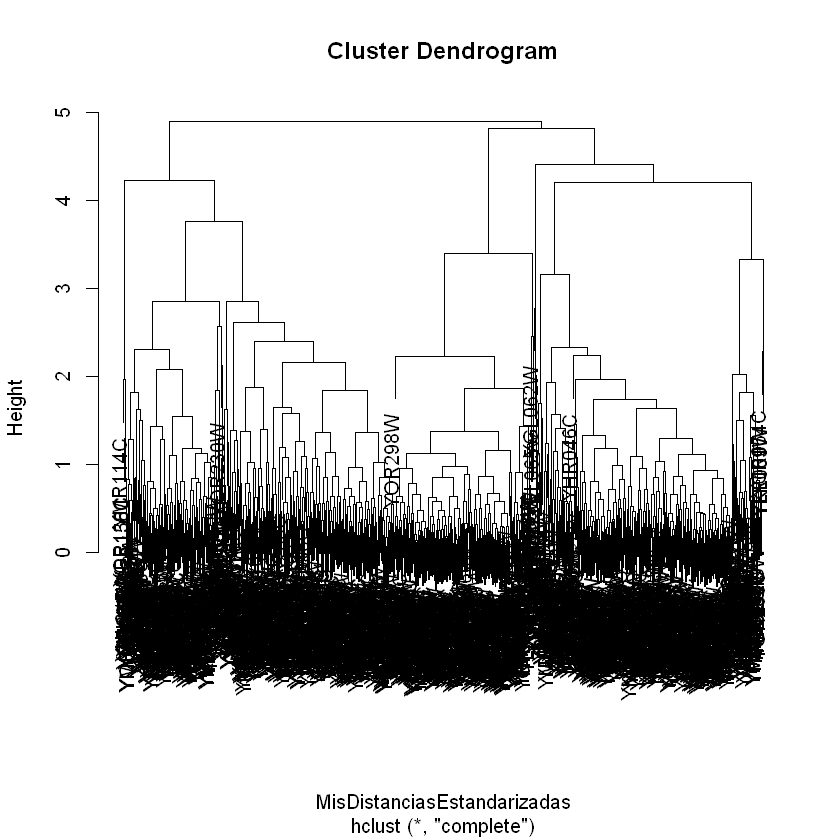

In [26]:
# Repetimos todo pero con MiTablaEstandarizada

MisDistanciasEstandarizadas <- dist(TablaEstandarizada,method="euclidean")
MisDistanciasEstandarizadas

MiClusteringEstandarizado <- hclust(MisDistanciasEstandarizadas,method="complete")
MiClusteringEstandarizado

plot(MiClusteringEstandarizado)

Notamos que podemos agrupar (de una manera un poco forzada) los elementos de la tabla en 5 conjuntos similares, por lo que probaremos con 5.

In [27]:
# Ahora probaremos con Correlación entre los datos originales

MisDistanciasCorrelacionadas <- as.dist(1-cor(t(Tabla)))
MisDistanciasCorrelacionadas

              YGR138C      YPR156C      YOR230W      YAL018C      YBR287W
YPR156C  0.1407957780                                                    
YOR230W  0.6233186624 0.3482885517                                       
YAL018C  0.6106153879 0.4138609663 0.2499292587                          
YBR287W  0.4676045296 0.3943457231 0.2797701376 0.0806371507             
YCL075W  0.5643972215 0.5091780282 0.3789506430 0.0675303845 0.0272353466
YDR055w  0.3149096654 0.2526870969 0.2554052393 0.1416238433 0.0712003625
YOR358W  0.5633067848 0.2949941229 0.1951580941 0.0596673672 0.1205369830
YBR006W  0.5831276566 0.3142109307 0.2075724356 0.1101782312 0.1004348673
YBR241C  0.8217643636 0.5962244120 0.2813112223 0.1107976094 0.1004124845
YCR021c  0.5635570173 0.3453720194 0.2778299783 0.0792888735 0.0593692700
YCR061W  0.6898063561 0.4607578947 0.1899929863 0.0577926899 0.0810040097
YDL024c  0.5522543014 0.3658333905 0.3062822845 0.0265896202 0.0509431327
YDR298C  0.5982494827 0.3419390462 0.2

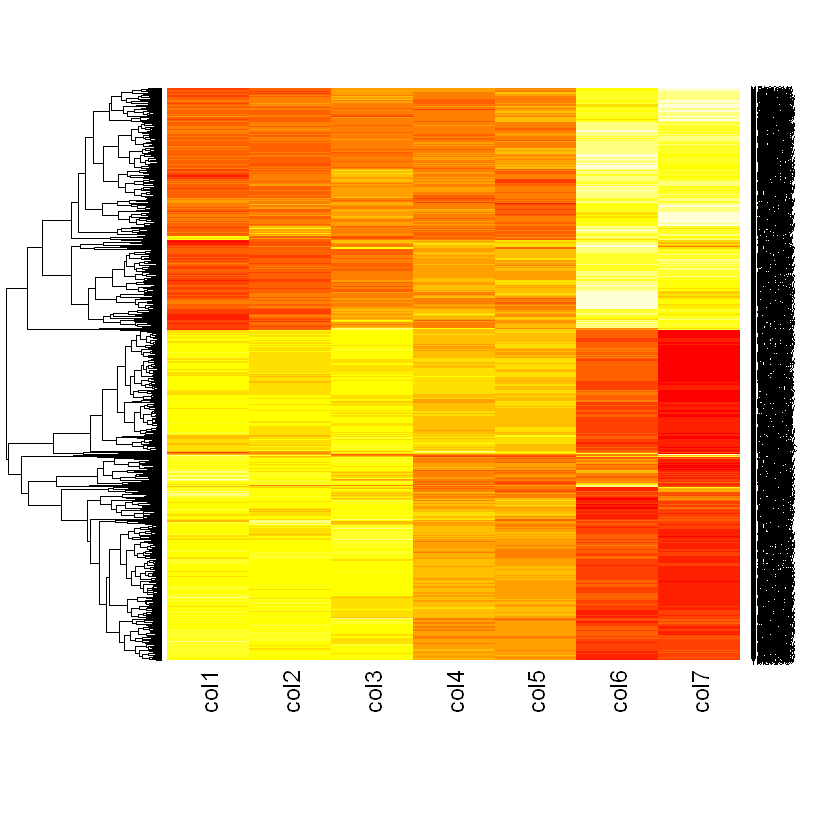

In [28]:
# Veamos el heatmap de la tabla estandarizada
heatmap(TablaEstandarizada,Colv=NA)

Como se esperaba, se puede agrupar en al menos 5 conjuntos diferentes los datos brindados.

In [39]:
# Cortamos el árbol del dendograma para agrupar los dos subárboles formados como un conjunto de genes con similitudes considerables

Corte <- cutree(MiClusteringEstandarizado,h=2.0) # Cortamos en esta altura (Solo como prueba)
t(Corte)
CorteGrupal <- cutree(MiClusteringEstandarizado,k=5) # Cortamos en 5 subarboles
t(CorteGrupal)


YGR138C YPR156C YOR230W YAL018C YBR287W YCL075W YDR055w YOR358W YBR006W
[1,] 1       1       2       3       4       4       4       3       3      
     YBR241C ... YOR182C YOR326W YPL080C YPL081W YPL090C YOR298W YDR019C
[1,] 5       ... 25      25      25      25      25      26      27     
     YKL096W YKL108W YPR113W
[1,] 27      28      28

YGR138C YPR156C YOR230W YAL018C YBR287W YCL075W YDR055w YOR358W YBR006W
[1,] 1       1       2       2       2       2       2       2       2      
     YBR241C ... YOR182C YOR326W YPL080C YPL081W YPL090C YOR298W YDR019C
[1,] 2       ... 5       5       5       5       5       5       5      
     YKL096W YKL108W YPR113W
[1,] 5       5       5

In [40]:
# Usamos el método de las K-medias para agrupar también

MiClusteringKMedias <- kmeans(TablaEstandarizada,5) # Agrupamos en 5 conjuntos mediante K medias
MiClusteringKMedias

K-means clustering with 5 clusters of sizes 181, 225, 200, 53, 173

Cluster means:
        col1       col2       col3        col4       col5       col6      col7
1 -0.6744719 -0.5650380 -0.3383109 -0.53945787 -0.5982734  1.2420748  1.473477
2  0.9773761  0.8813022  0.8280404 -0.02705926 -0.1449273 -1.1719390 -1.342793
3  0.7165943  0.5943097  0.7933716  0.31991980  0.2789350 -0.9748365 -1.728294
4  1.1656639  0.9129348  0.5981172 -0.58630841 -0.6232006 -0.5100319 -0.957175
5 -1.0666716 -0.8392828 -0.3785563 -0.18281036 -0.0235406  1.4867685  1.004093

Clustering vector:
 YGR138C  YPR156C  YOR230W  YAL018C  YBR287W  YCL075W  YDR055w  YOR358W 
       5        5        5        5        5        5        5        5 
 YBR006W  YBR241C  YCR021c  YCR061W  YDL024c  YDR298C  YER141w  YER158c 
       5        5        5        5        5        5        5        5 
 YGR028W  YGR149W  YIR038C  YJL155C  YLR297W  YLR423C  YOL083W  YOR049C 
       5        5        5        5        5        5     